<h1 style="text-align:center; color:#B46F60; font-weight:bold;">Melbourne Houses Price 🏙️</h1>


![title](https://cdn.pixabay.com/photo/2017/01/12/02/21/melbourne-1973533_960_720.jpg)

<a id='top'></a>
<div class="list-group" id="list-tab" role="tablist">
<p style="background-color:#E3D6C5;font-family:newtimeroman;color:#FFF9ED;font-size:150%;text-align:center;border-radius:10px 10px;">📋 Dataset Discription</p>   

    
    
This data was scraped from publicly available results posted every week from Domain.com.au by **Tony Pino**. 

The dataset includes Address, Type of Real estate, Suburb, Method of Selling, Rooms, Price, Real Estate Agent, Date of Sale and distance from C.B.D.

    
[Original Dataset](https://www.kaggle.com/datasets/anthonypino/melbourne-housing-market?select=Melbourne_housing_FULL.csv)

`1. Suburb:` The name of the suburb where the property is located.

`2. Address:` The specific address of the property.

`3. Rooms:` The number of rooms in the property (bedrooms, living rooms, etc.).

`4. Price:` The price of the property in Australian dollars. 

`5. Method:` The method used for selling the property (e.g., auction, private sale).

`6. Type:` The type of property (house, unit, townhouse, etc.).

`7. SellerG:` The name of the real estate agent who sold the property.

`8. Date:` The date when the property was sold.

`9. Distance:` The distance of the property from the central business district (CBD) in kilometers.

`10. Regionname:` The general region of Melbourne where the property is located (e.g., West, North East).

`11. Propertycount:` The number of properties that exist in the same suburb.

`12. Bedroom2:` The number of bedrooms in the property (as scraped from a different source).

`13. Bathroom:` The number of bathrooms in the property.

`14. Car:` The number of parking spots available for cars.

`15. 1Landsize:` The size of the land associated with the property, measured in square meters.

`16. BuildingArea:` The size of the building or property's interior, measured in square meters.

`17. YearBuilt:` The year in which the property was built.

`18. CouncilArea:` The governing council for the area where the property is located.

`19. Latitude:` The latitude coordinate of the property's location.

`20. Longitude:` The longitude coordinate of the property's location.

<a id="1"></a>
# <p style="background-color:#E3D6C5;font-family:newtimeroman;color:#FFF9ED;font-size:150%;text-align:center;border-radius:10px 10px;">Importing Libraries</p>


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno 
import plotly.express as px
import warnings
warnings.filterwarnings('ignore') # ignore warnings.

In [2]:
data = pd.read_csv("/kaggle/input/melbourne-housing-market/Melbourne_housing_FULL.csv")
data.shape

(34857, 21)

In [3]:
pd.set_option('display.max_columns', None)
data.head(5)

Suburb             Address  Rooms Type      Price Method SellerG  \
0  Abbotsford       68 Studley St      2    h        NaN     SS  Jellis   
1  Abbotsford        85 Turner St      2    h  1480000.0      S  Biggin   
2  Abbotsford     25 Bloomburg St      2    h  1035000.0      S  Biggin   
3  Abbotsford  18/659 Victoria St      3    u        NaN     VB  Rounds   
4  Abbotsford        5 Charles St      3    h  1465000.0     SP  Biggin   

        Date  Distance  Postcode  Bedroom2  Bathroom  Car  Landsize  \
0  3/09/2016       2.5    3067.0       2.0       1.0  1.0     126.0   
1  3/12/2016       2.5    3067.0       2.0       1.0  1.0     202.0   
2  4/02/2016       2.5    3067.0       2.0       1.0  0.0     156.0   
3  4/02/2016       2.5    3067.0       3.0       2.0  1.0       0.0   
4  4/03/2017       2.5    3067.0       3.0       2.0  0.0     134.0   

   BuildingArea  YearBuilt         CouncilArea  Lattitude  Longtitude  \
0           NaN        NaN  Yarra City Council   -37.8014    144.9958   
1           NaN        NaN  Yarra City Council   -37.7996    144.9984   
2          79.0     1900.0  Yarra City Council   -37.8079    144.9934   
3           NaN        NaN  Yarra City Council   -37.8114    145.0116   
4         150.0     1900.0  Yarra City Council   -37.8093    144.9944   

              Regionname  Propertycount  
0  Northern Metropolitan         4019.0  
1  Northern Metropolitan         4019.0  
2  Northern Metropolitan         4019.0  
3  Northern Metropolitan         4019.0  
4  Northern Metropolitan         4019.0

In [4]:
def generate_colors(num):
    colors = []
    lst = list('ABCDEF0123456789')

    for i in range(num):
        colors.append('#'+''.join(np.random.choice(lst, 6)))
        
    return colors

# ----------------------------------------------------------------------
def missing_percentage(dataframe):
    """
    This function return take data frame and return data frame 
    with columns name, the number of missing values and the percentage 
    of them in each column.
    """
    total_missing = dataframe.isnull().sum().sort_values(ascending=False)
    missing_values = total_missing[total_missing.values !=0]
    missing_cols = missing_values.index
    
    missing_cols = dataframe[missing_cols].dtypes.values

    per = round((missing_values/len(dataframe))*100, 2)
    missing_df = pd.DataFrame(missing_values, columns=['Number of missing values'])
    
    return missing_df.assign(Percentage=per, Dtype=missing_cols)
#-----------------------------------------------------------------------------
def show_distribution(dataframe, col):
    fig, ax = plt.subplots(1, 2, figsize=(20,8))
    colors = generate_colors(1)
    
    sns.boxplot(data=dataframe, x=col, ax=ax[0], palette=colors)
    ax[0].set_title(f'{col.title()} Boxplot')
    
    sns.histplot(data=dataframe, x=col, ax=ax[1], color=colors, kde=True)
    ax[1].set_title(f'{col.title()} Histogram')
    
    fig.suptitle(f'{col.title()} Distribution'.replace('_', ' '), fontsize=15, color='brown')
#-----------------------------------------------------------------------------------


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>

RangeIndex: 34857 entries, 0 to 34856

Data columns (total 21 columns):

 #   Column         Non-Null Count  Dtype  

---  ------         --------------  -----  

 0   Suburb         34857 non-null  object 

 1   Address        34857 non-null  object 

 2   Rooms          34857 non-null  int64  

 3   Type           34857 non-null  object 

 4   Price          27247 non-null  float64

 5   Method         34857 non-null  object 

 6   SellerG        34857 non-null  object 

 7   Date           34857 non-null  object 

 8   Distance       34856 non-null  float64

 9   Postcode       34856 non-null  float64

 10  Bedroom2       26640 non-null  float64

 11  Bathroom       26631 non-null  float64

 12  Car            26129 non-null  float64

 13  Landsize       23047 non-null  float64

 14  BuildingArea   13742 non-null  float64

 15  YearBuilt      15551 non-null  float64

 16  CouncilArea    34854 non-null  object 

 17  Lattitude      26881 non-nul

In [6]:
missing_percentage(data)

Number of missing values  Percentage    Dtype
BuildingArea                      21115       60.58  float64
YearBuilt                         19306       55.39  float64
Landsize                          11810       33.88  float64
Car                                8728       25.04  float64
Bathroom                           8226       23.60  float64
Bedroom2                           8217       23.57  float64
Longtitude                         7976       22.88  float64
Lattitude                          7976       22.88  float64
Price                              7610       21.83  float64
Regionname                            3        0.01   object
CouncilArea                           3        0.01   object
Propertycount                         3        0.01  float64
Postcode                              1        0.00  float64
Distance                              1        0.00  float64

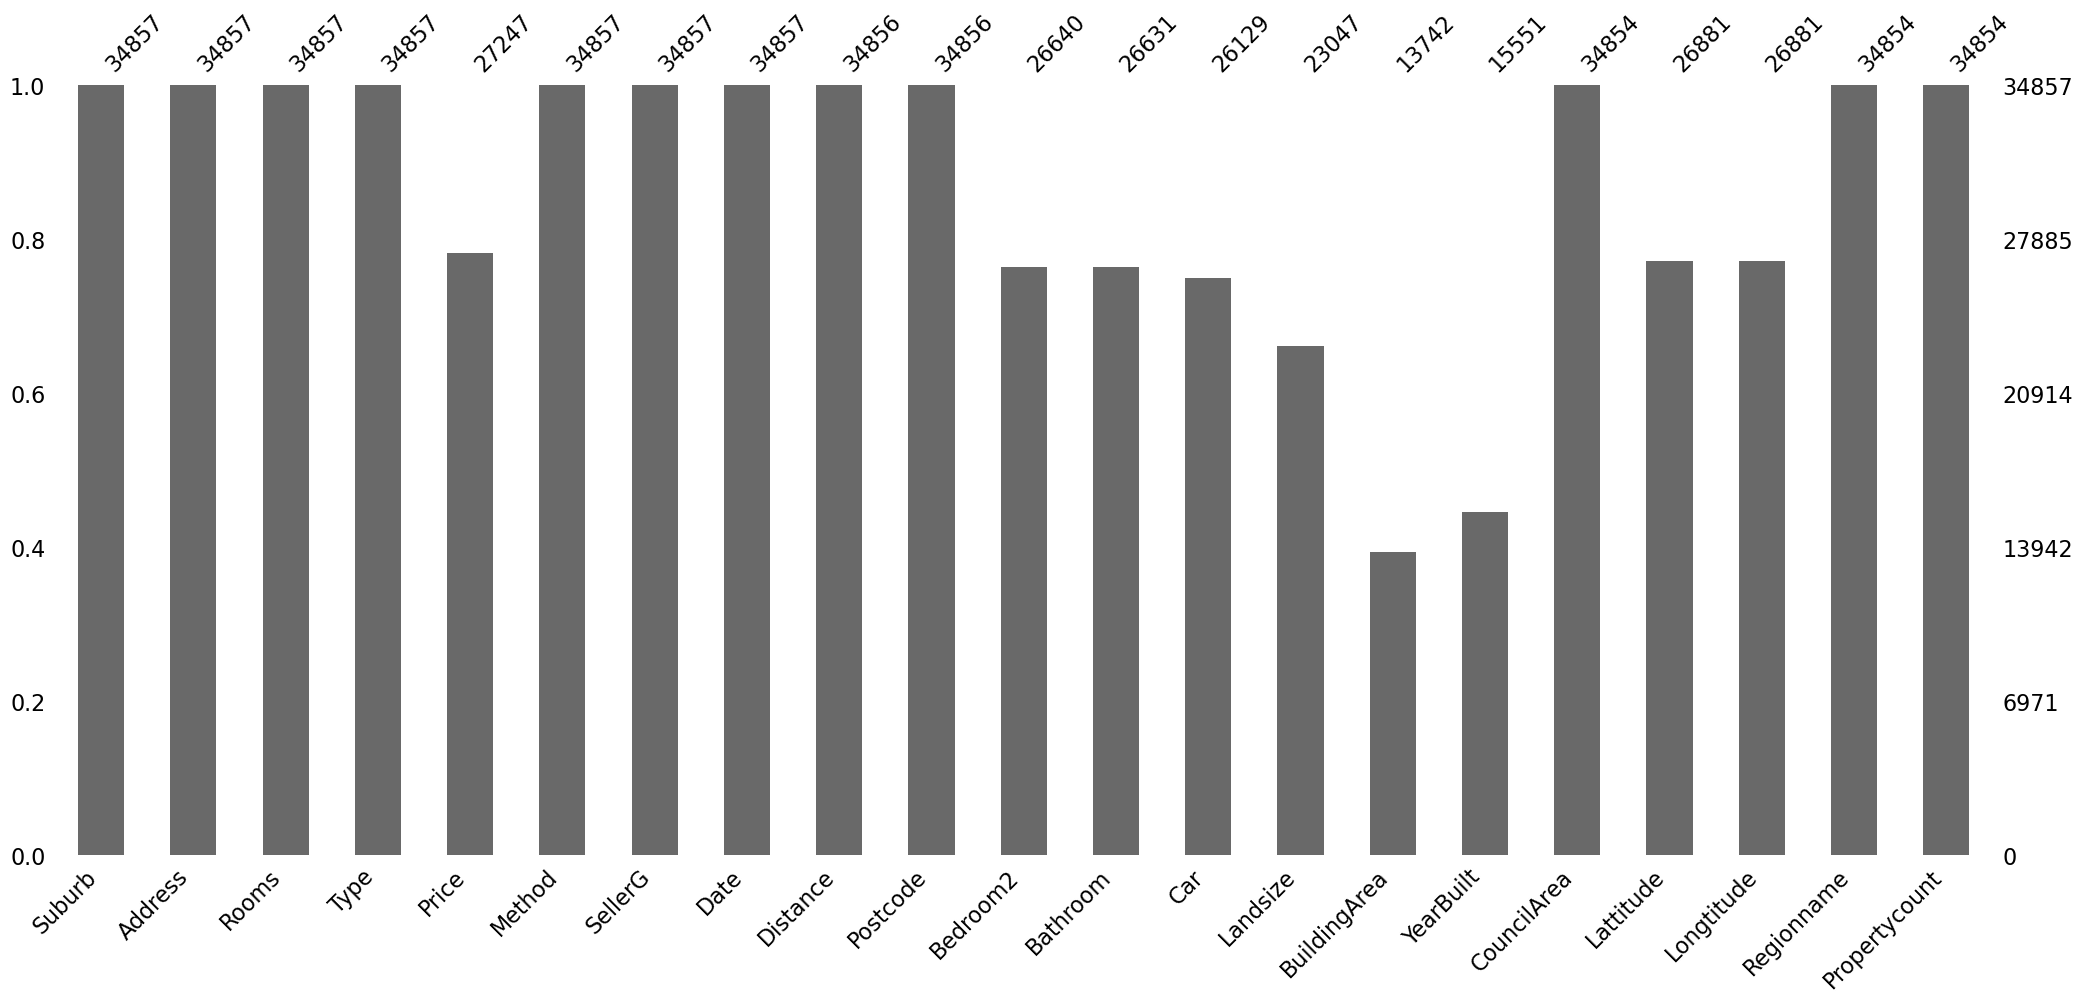

In [7]:
msno.bar(data);

From the previous analysis, we can deduce the following insights regarding the columns with missing values:

1. **BuildingArea** and **YearBuilt** columns have missing values exceeding 50% of the dataset. Given this substantial proportion of missing data:
- Impute missing values in BuildingArea and YearBuilt with their respective medians.
- Apply the same imputation strategy for the Landsize and Price columns.

2. Moving forward, for the **Car** column:
- it is logical to use the mode (the most common value) as the imputation strategy, as it will best represent the typical scenario.

3. In the case of the **Bathroom** and **Bedroom2** columns:
- By imputing missing values in these columns with the mode value associated with the corresponding Rooms column, we can account for the logical correlation between the number of rooms and other attributes.

4. For the **Longtitude** and **Lattitude** columns, which represent geographic coordinates:
- Due to their specialized nature, consider removing rows with missing coordinates as imputing them might lead to misleading results.

5. For the columns **Regionname**, **CouncilArea**, **Propertycount**, **Postcode**, and **Distance**:
- The small number of missing values suggests that removing the respective rows might be the most appropriate action, considering the minimal impact on the dataset's size.

In [8]:
data.shape

(34857, 21)

In [9]:
# Drop rows with missing values in Longtitude, Lattitude, Regionname, CouncilArea, Propertycount, Postcode, Distance
data.dropna(subset=['Longtitude', 'Lattitude','Regionname', 'CouncilArea', 'Propertycount', 'Postcode', 'Distance'], inplace=True)
missing_percentage(data)

Number of missing values  Percentage    Dtype
BuildingArea                     13148       48.91  float64
YearBuilt                        11339       42.18  float64
Price                             5888       21.90  float64
Landsize                          3860       14.36  float64
Car                                778        2.89  float64
Bathroom                           276        1.03  float64
Bedroom2                           267        0.99  float64

In [10]:
data.shape

(26881, 21)

In [11]:
# Impute missing values in Car with mode
mode_car = data['Car'].mode()[0]
data['Car'].fillna(mode_car, inplace=True)
missing_percentage(data)

Number of missing values  Percentage    Dtype
BuildingArea                     13148       48.91  float64
YearBuilt                        11339       42.18  float64
Price                             5888       21.90  float64
Landsize                          3860       14.36  float64
Bathroom                           276        1.03  float64
Bedroom2                           267        0.99  float64

In [12]:
# Conditional imputation of Bathroom and Bedroom2 with mode of Rooms
data['Bathroom'].fillna(data.groupby('Rooms')['Bathroom'].transform(lambda x: x.mode()[0]), inplace=True)
data['Bedroom2'].fillna(data.groupby('Rooms')['Bedroom2'].transform(lambda x: x.mode()[0]), inplace=True)
missing_percentage(data)

Number of missing values  Percentage    Dtype
BuildingArea                     13148       48.91  float64
YearBuilt                        11339       42.18  float64
Price                             5888       21.90  float64
Landsize                          3860       14.36  float64

In [13]:
columns_to_impute = ['BuildingArea', 'YearBuilt', 'Landsize', 'Price']

for column in columns_to_impute:
    median_value = data[column].median()
    data[column].fillna(median_value, inplace=True)
missing_percentage(data)

Empty DataFrame
Columns: [Number of missing values, Percentage, Dtype]
Index: []

In [14]:
print(data.duplicated().sum())
data.drop_duplicates(inplace=True)

print(data.duplicated().sum())

1

0


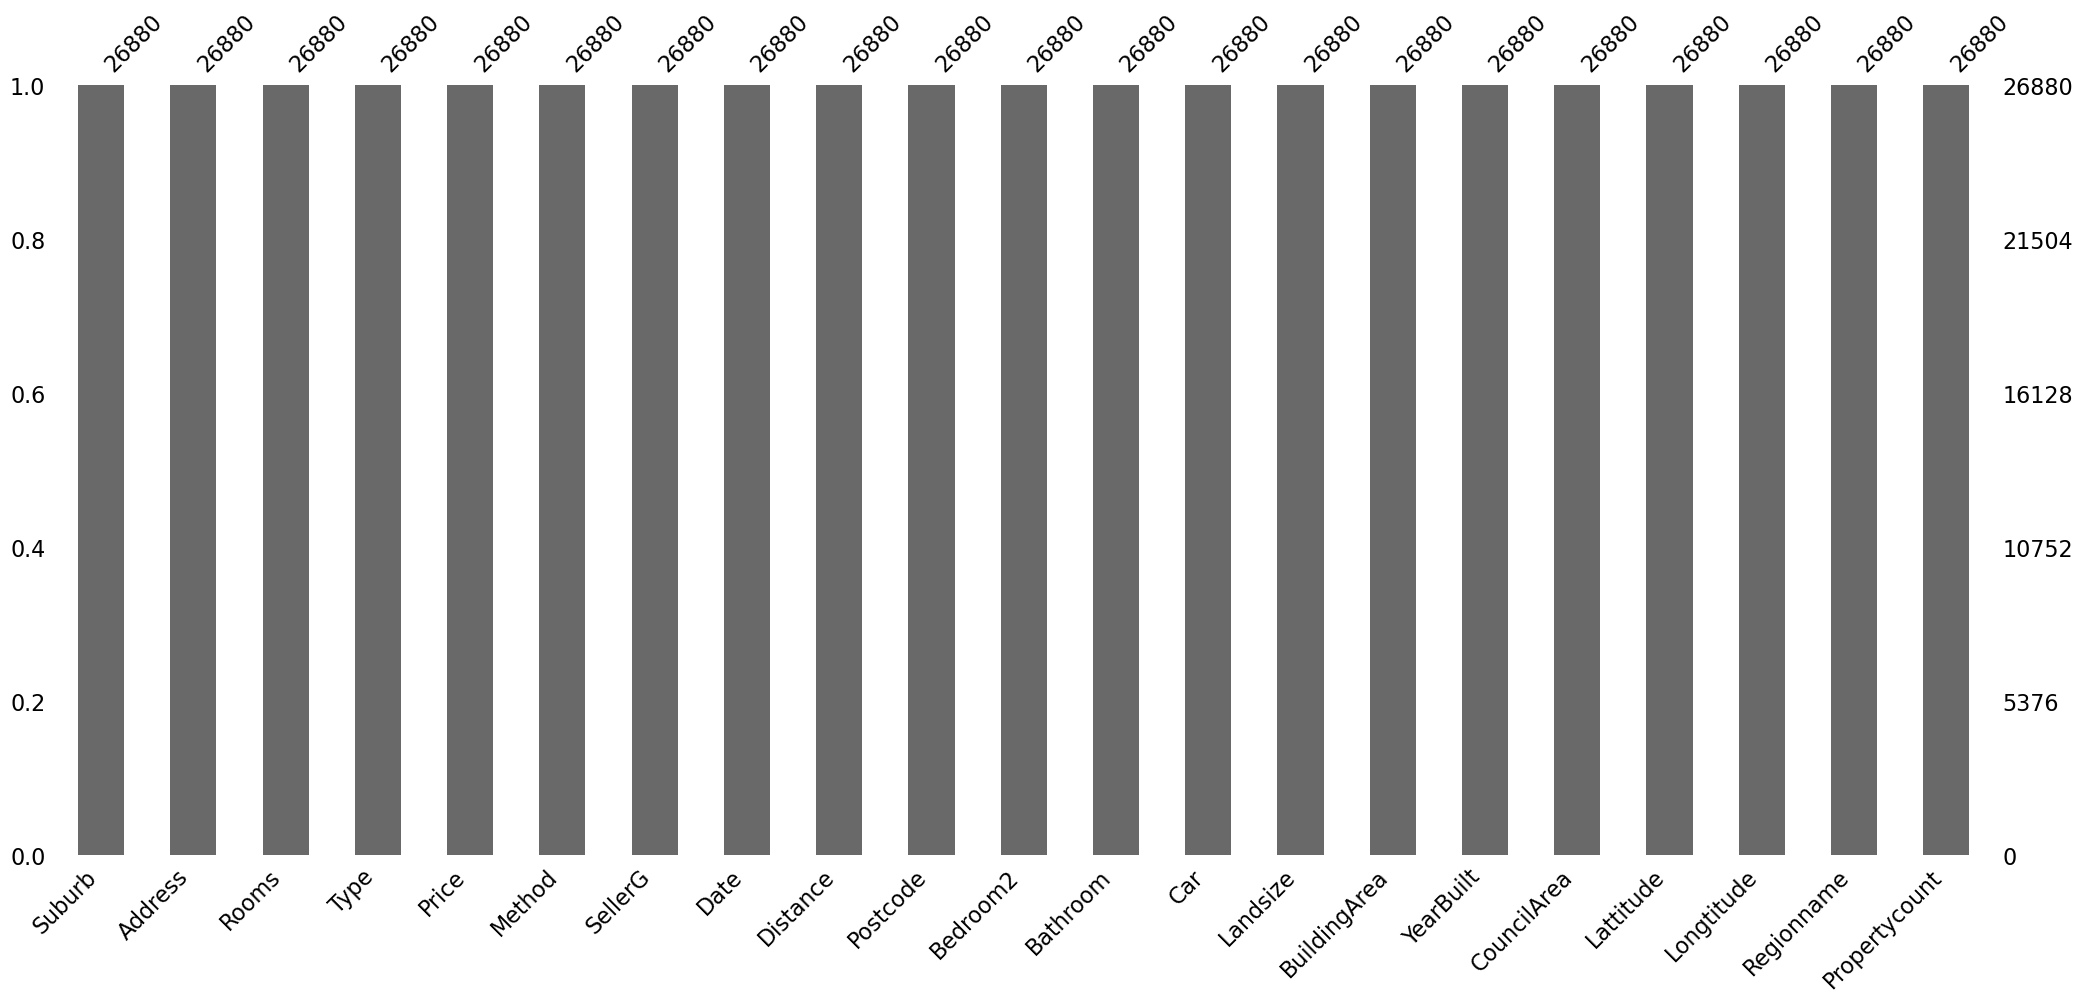

In [15]:
msno.bar(data);

<a id="8"></a>
# <p style="background-color:#E3D6C5;font-family:newtimeroman;color:#FFF9ED;font-size:150%;text-align:center;border-radius:10px 10px;">Visualization</p>

### Type of houses available in Melbourne Area according to this dataset

In [16]:
data.Type.value_counts(dropna=False).to_frame()

Type
h  20540
u   4363
t   1977

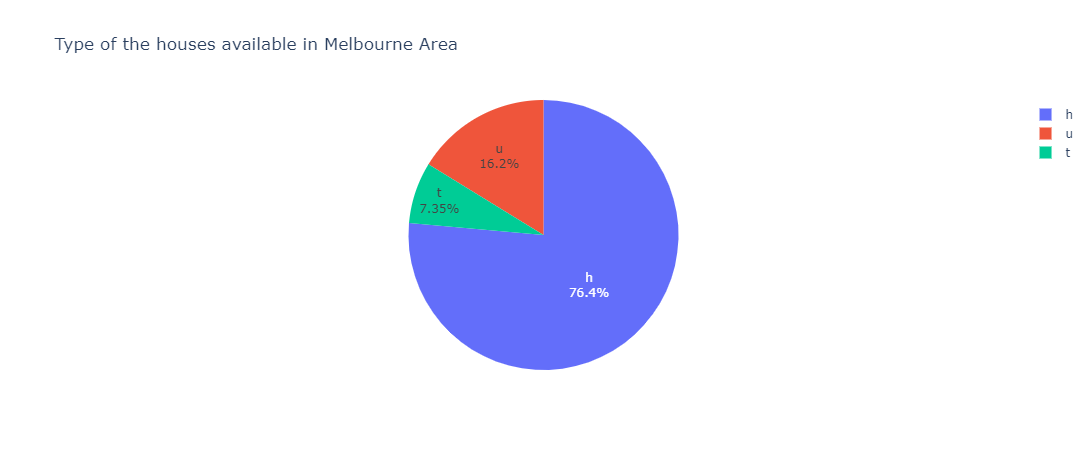

In [17]:
fig = px.pie(data.Type.value_counts(dropna=False), values='Type', names=['h','u','t'],
             title='Type of the houses available in Melbourne Area',width=600)
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show()

### Most frequent available car parking spaces for each type of houses

In [18]:
# Create cross-tabulation for types 'h', 'u', and 't'
cross_tab = pd.crosstab(data['Type'], data['Car'])

# Get the top 2 car value counts for each type
top_car_counts = cross_tab.apply(lambda row: row.nlargest(2), axis=1)

# Print the top car counts for each type
top_car_counts

Car    1.0    2.0
Type             
h     5111  11047
t      798   1096
u     3247    832

As we can see above , houses and townhouse has usually 2 car parking spcaces and unit has only one parking space available and some are available for 2 spots.

### Most expensive house in Melbourne Area

In [19]:
# Group by 'Type' and find the maximum 'Price'
most_exp = pd.DataFrame(data.groupby('Type')['Price'].max()).reset_index()

# Sort the data by 'Price' in descending order
most_exp = most_exp.sort_values(by='Price', ascending=False)

# Convert to a crosstab
pd.crosstab(index=most_exp['Type'], columns='Max Price', values=most_exp['Price'], aggfunc='first')


col_0   Max Price
Type             
h      11200000.0
t       3820000.0
u       3625000.0

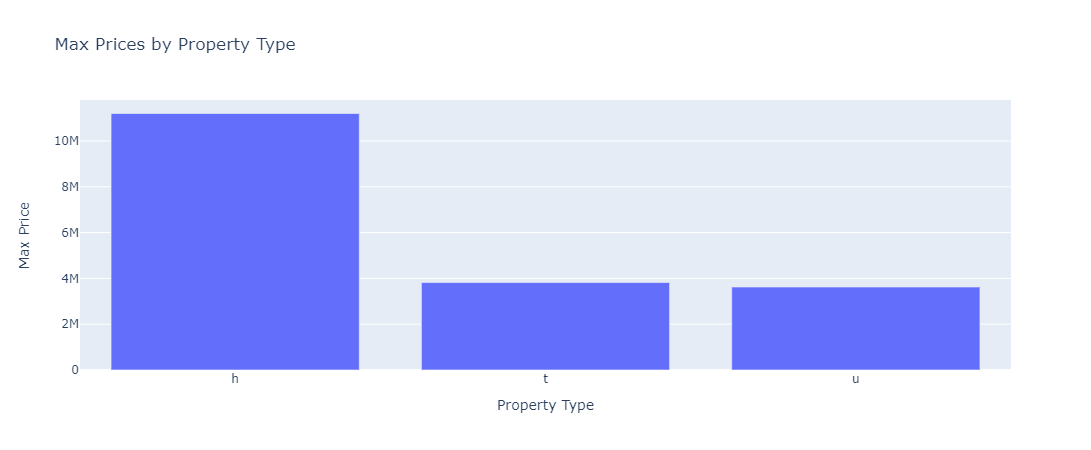

In [20]:
# Create a bar chart using Plotly Express
fig = px.bar(most_exp, x='Type', y='Price', labels={'Type': 'Property Type', 'Price': 'Max Price'},
             title='Max Prices by Property Type')

# Show the plot
fig.show()

In [21]:
num_cols = data.select_dtypes(exclude='object').columns
obj_cols = data.select_dtypes(include='object').columns

In [22]:
print(f'Numerical Columns : {num_cols}', end='\n\n')
print(f'Object Columns : {obj_cols}')

Numerical Columns : Index(['Rooms', 'Price', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car',

       'Landsize', 'BuildingArea', 'YearBuilt', 'Lattitude', 'Longtitude',

       'Propertycount'],

      dtype='object')



Object Columns : Index(['Suburb', 'Address', 'Type', 'Method', 'SellerG', 'Date', 'CouncilArea',

       'Regionname'],

      dtype='object')


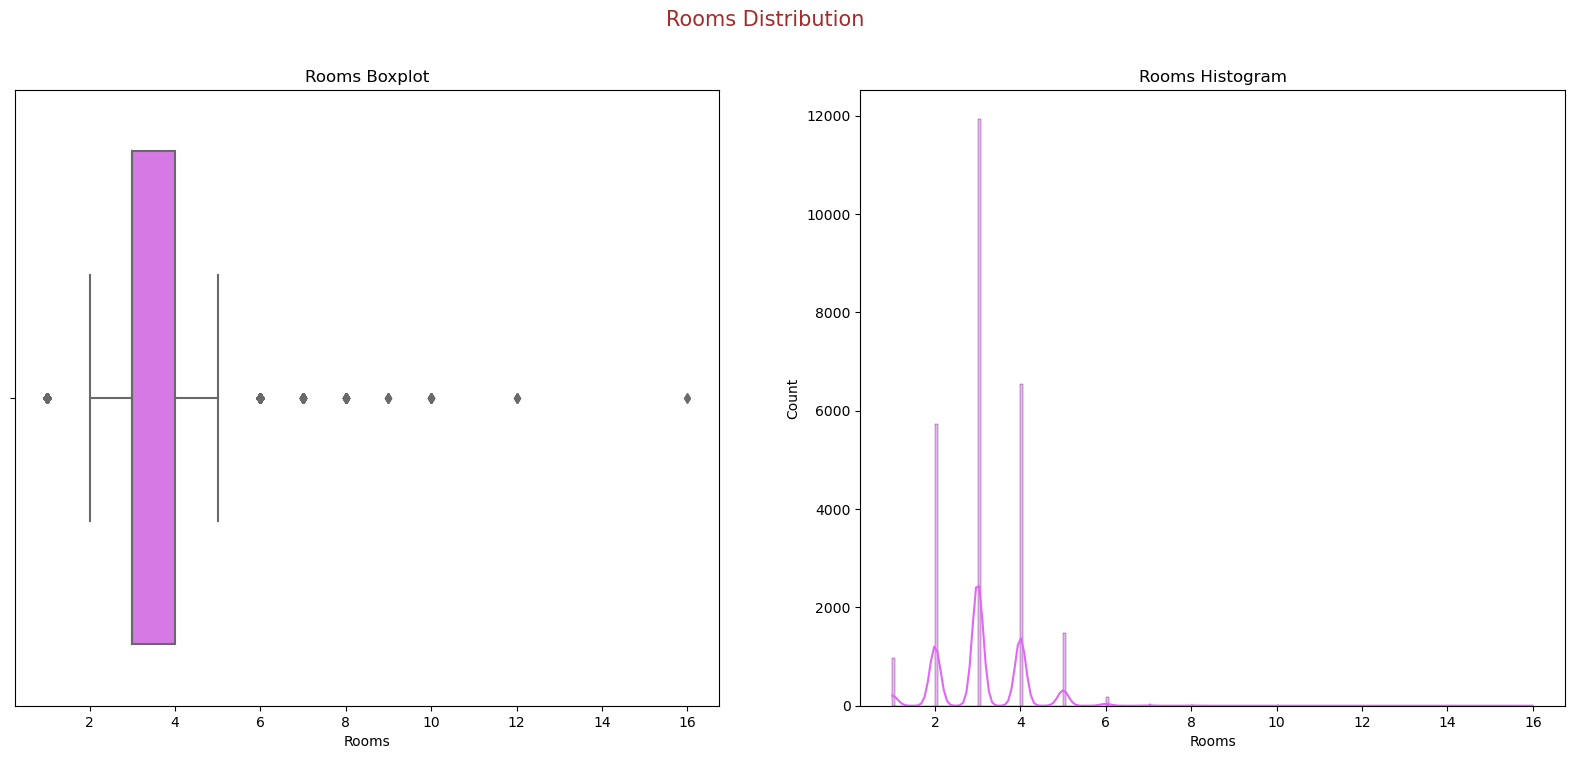

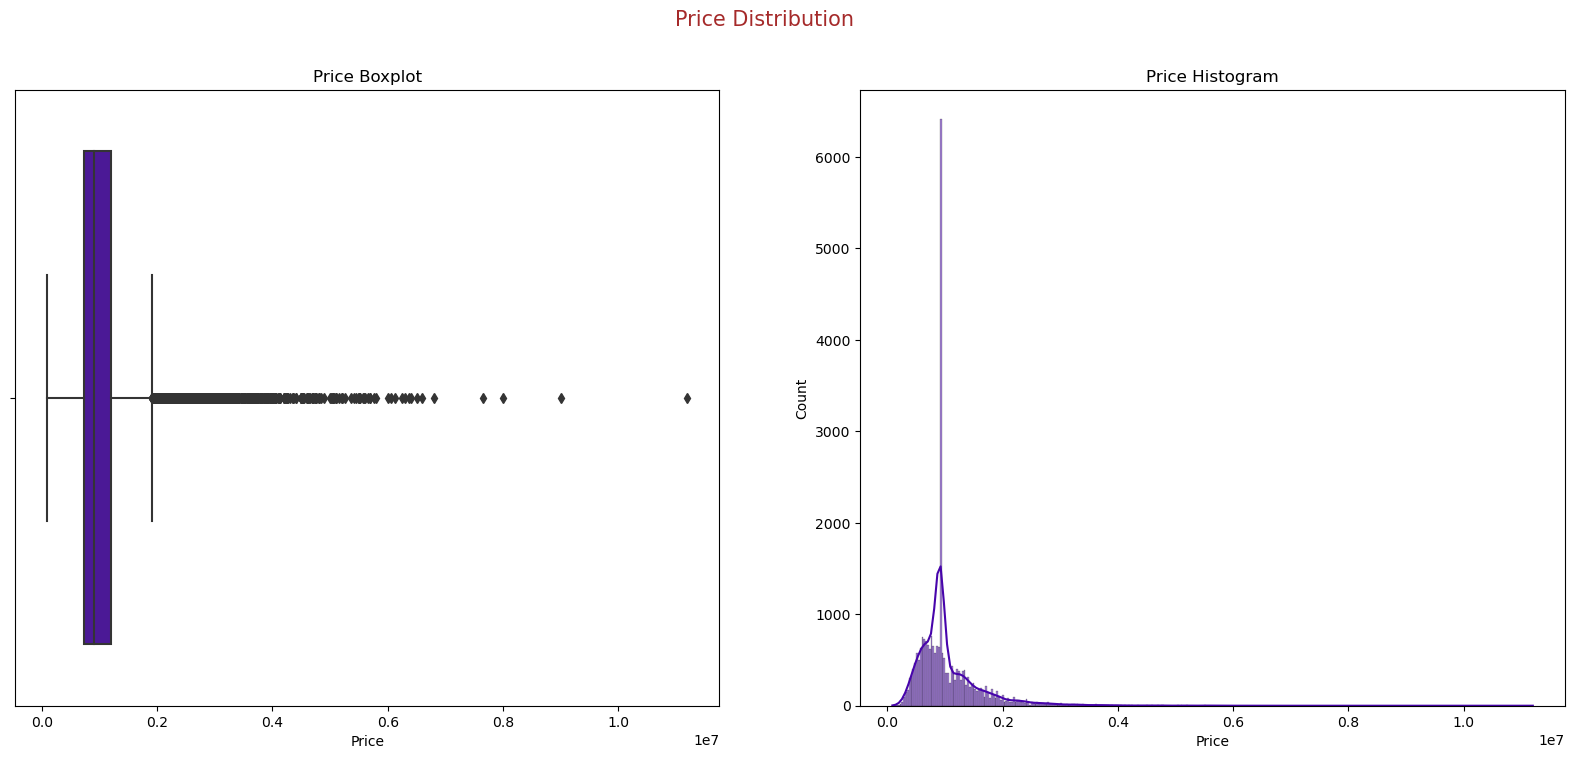

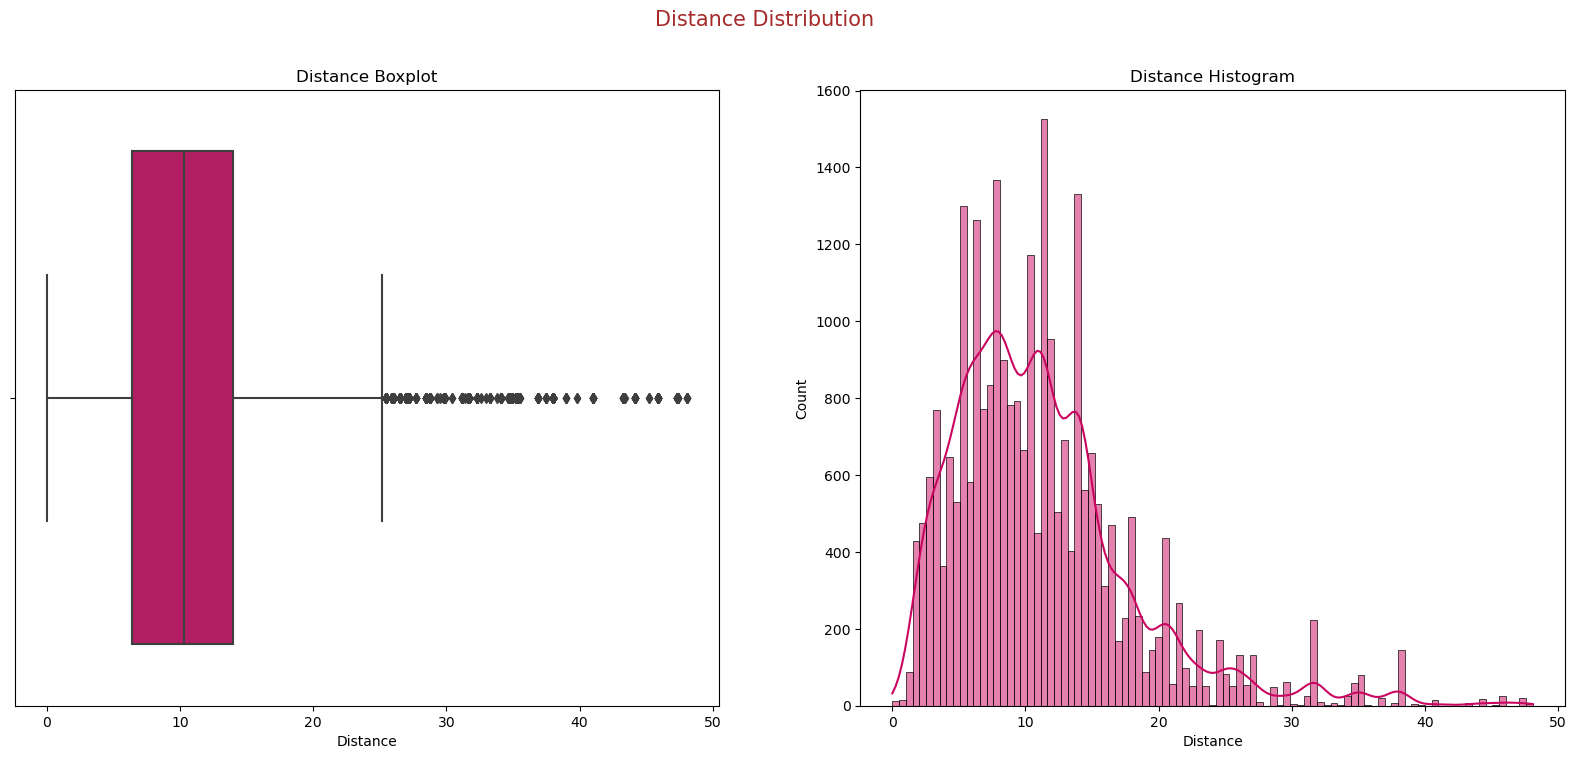

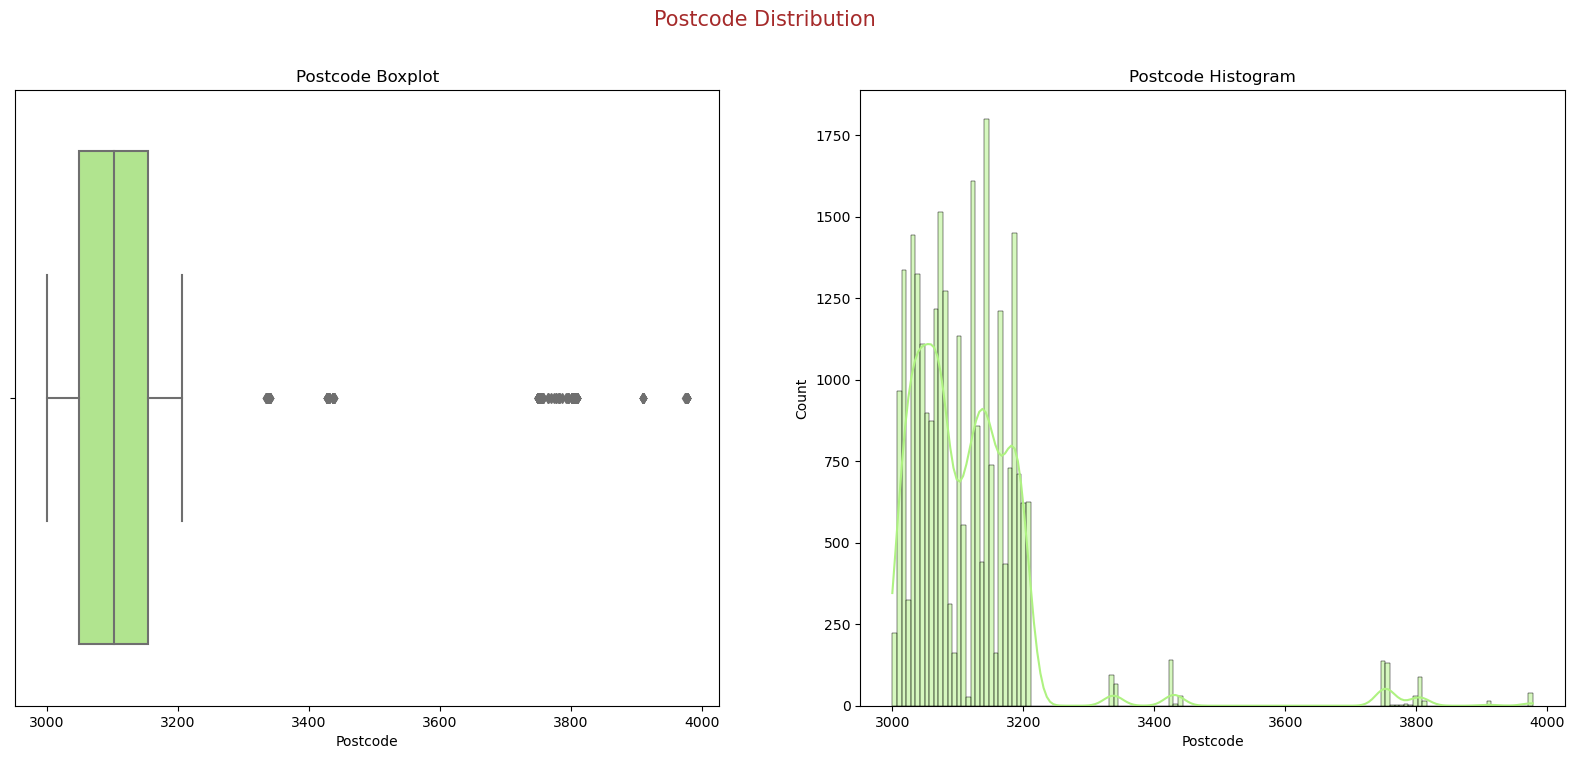

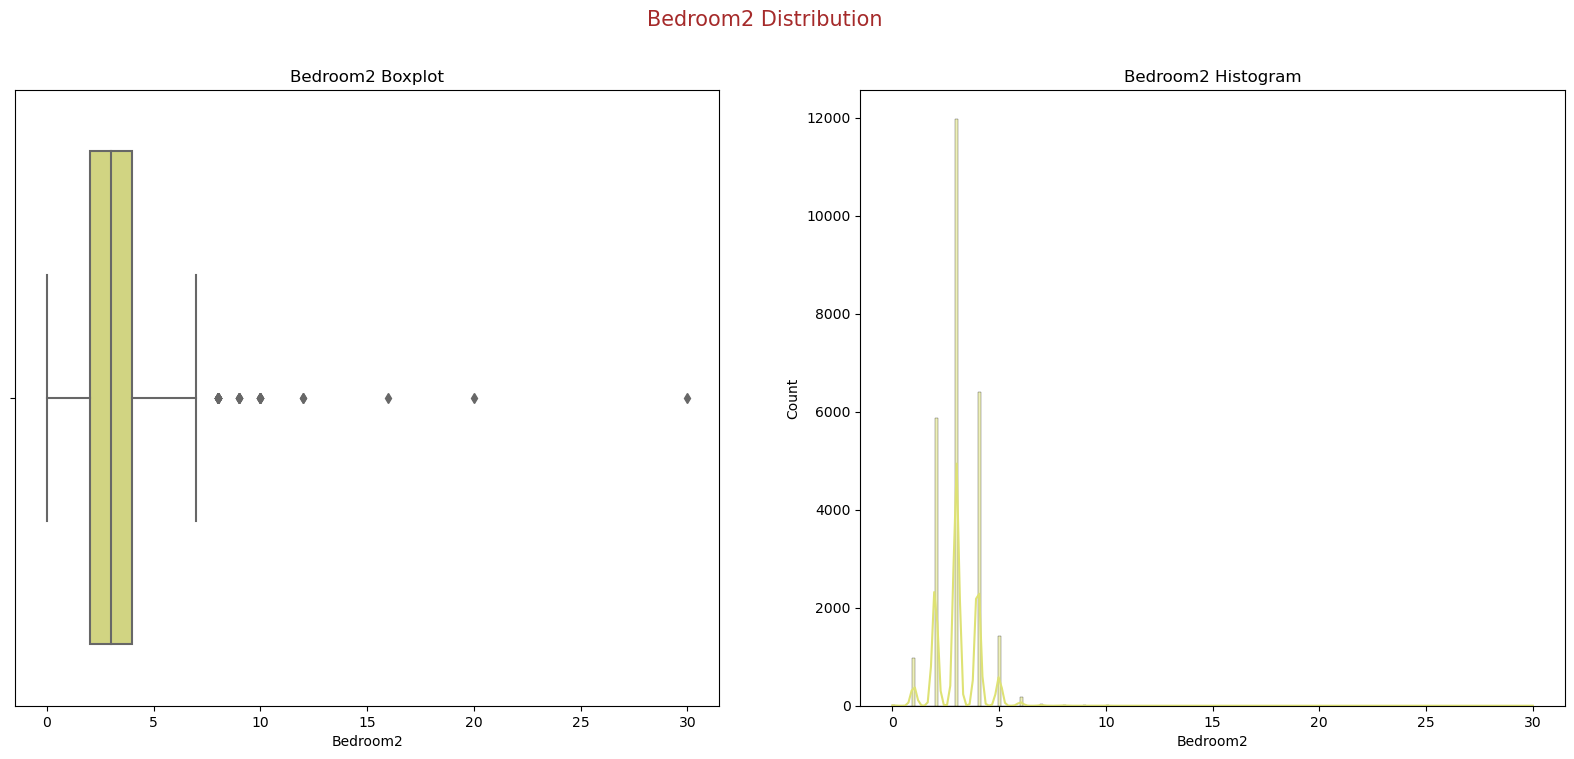

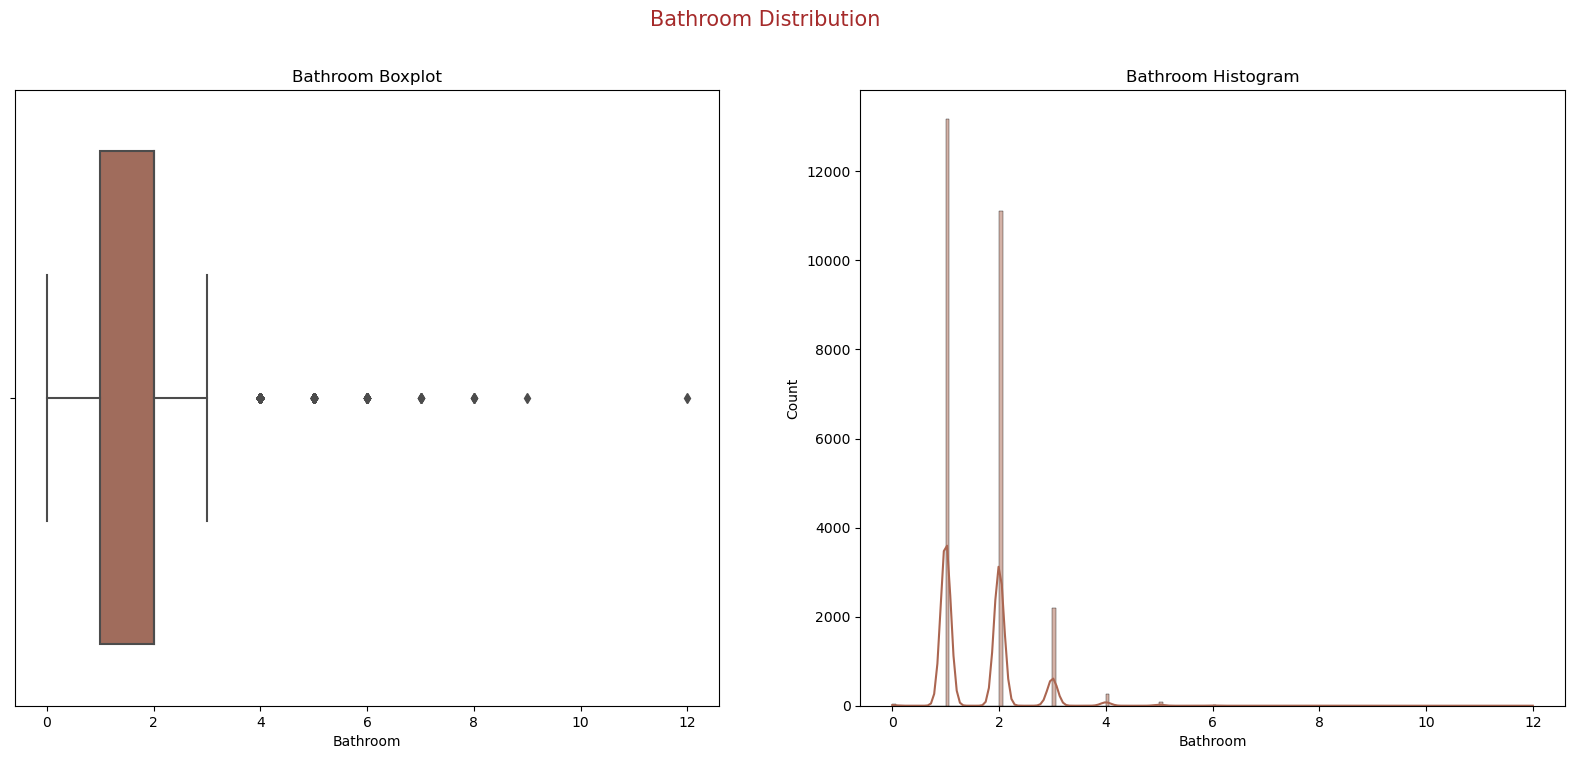

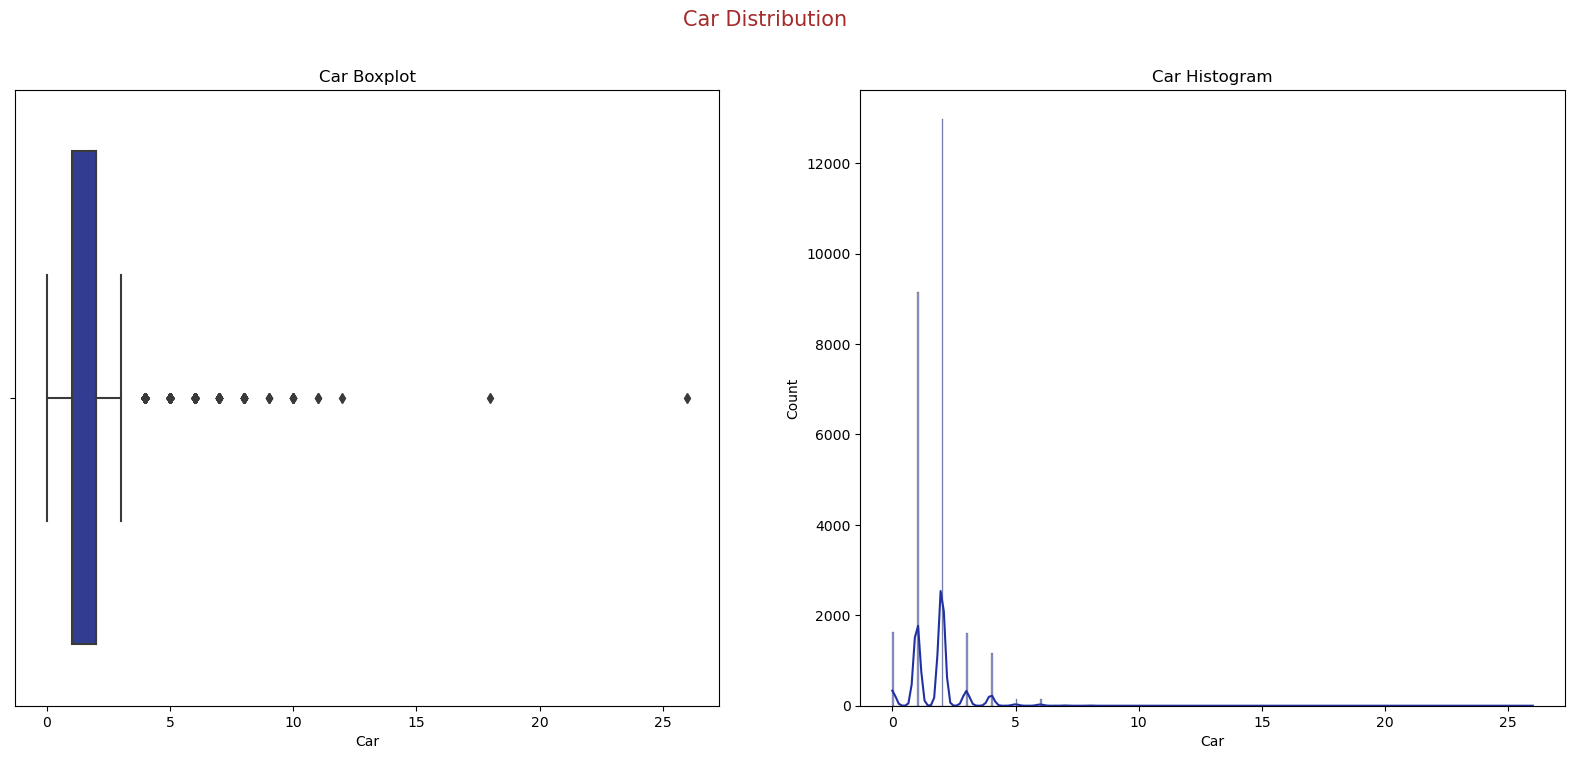

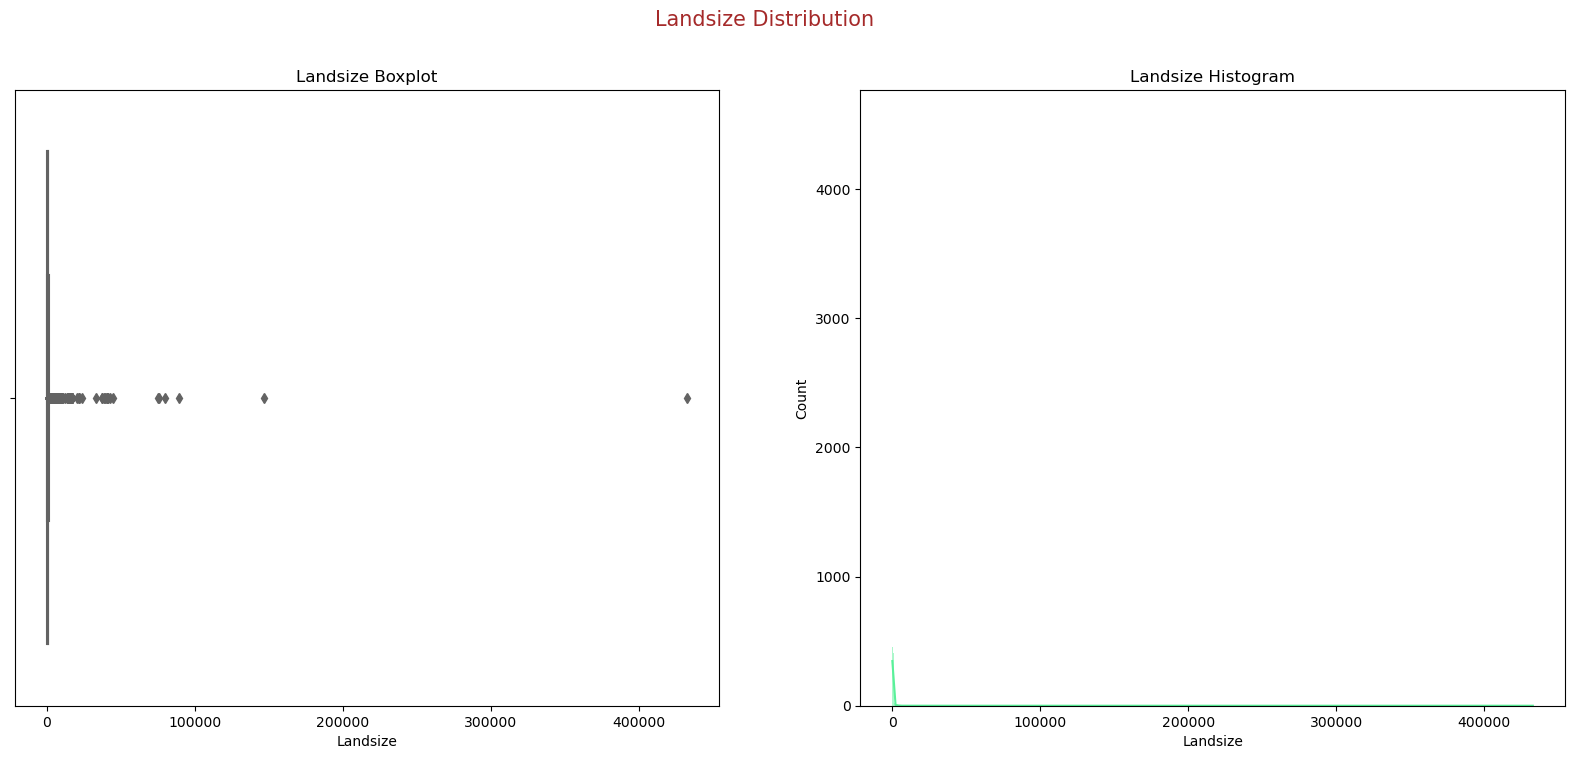

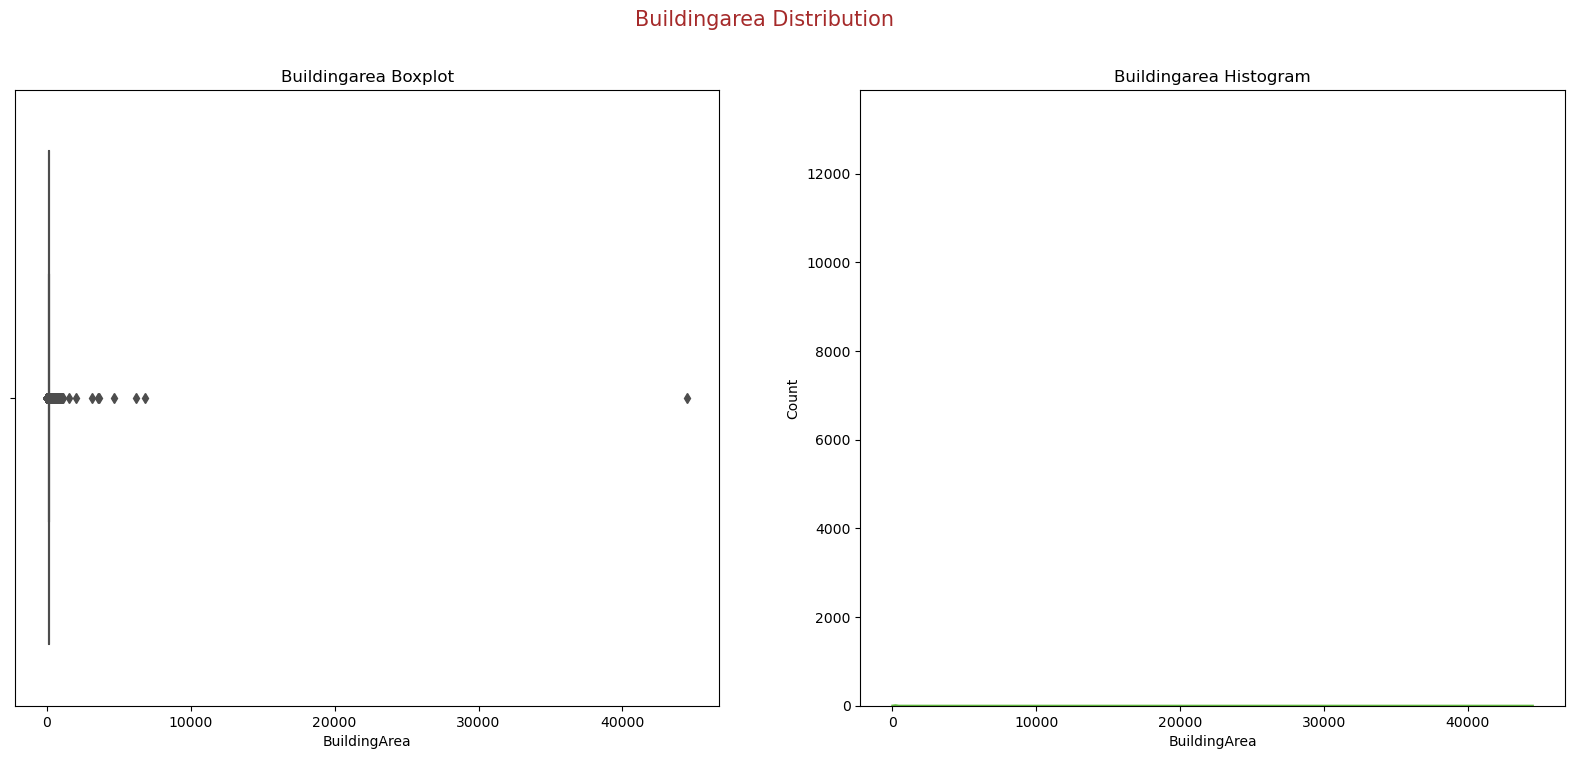

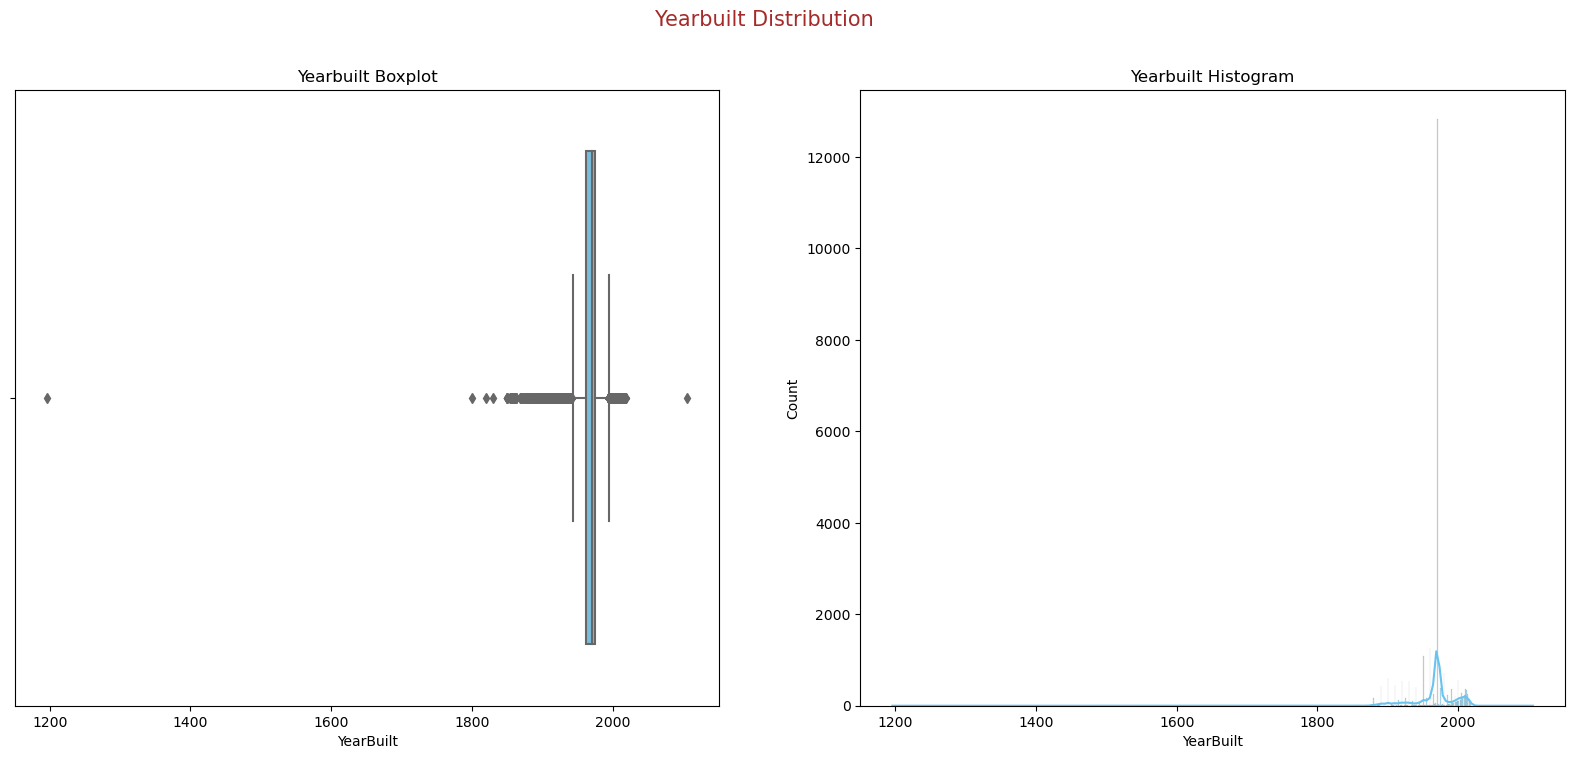

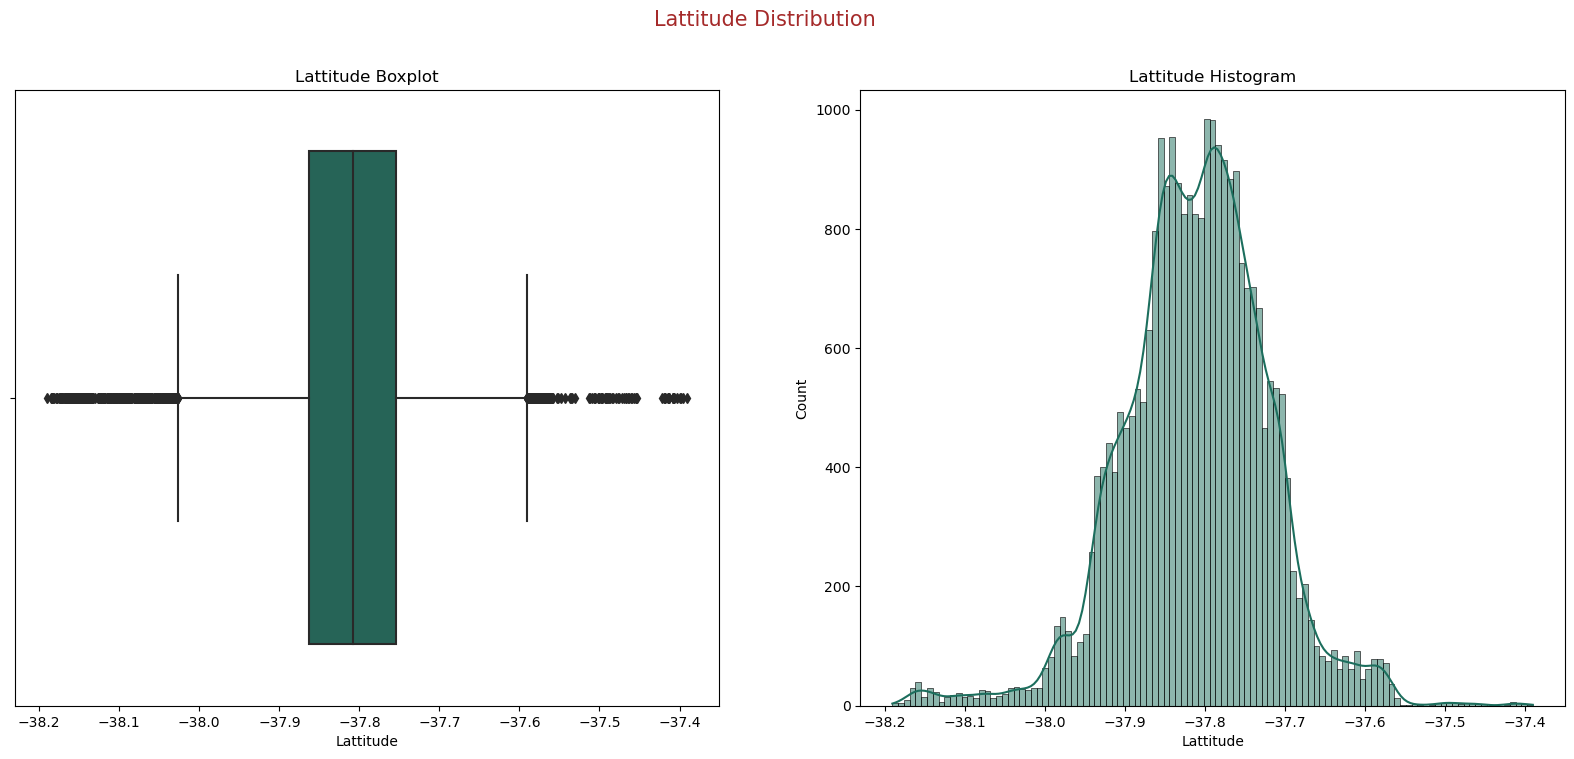

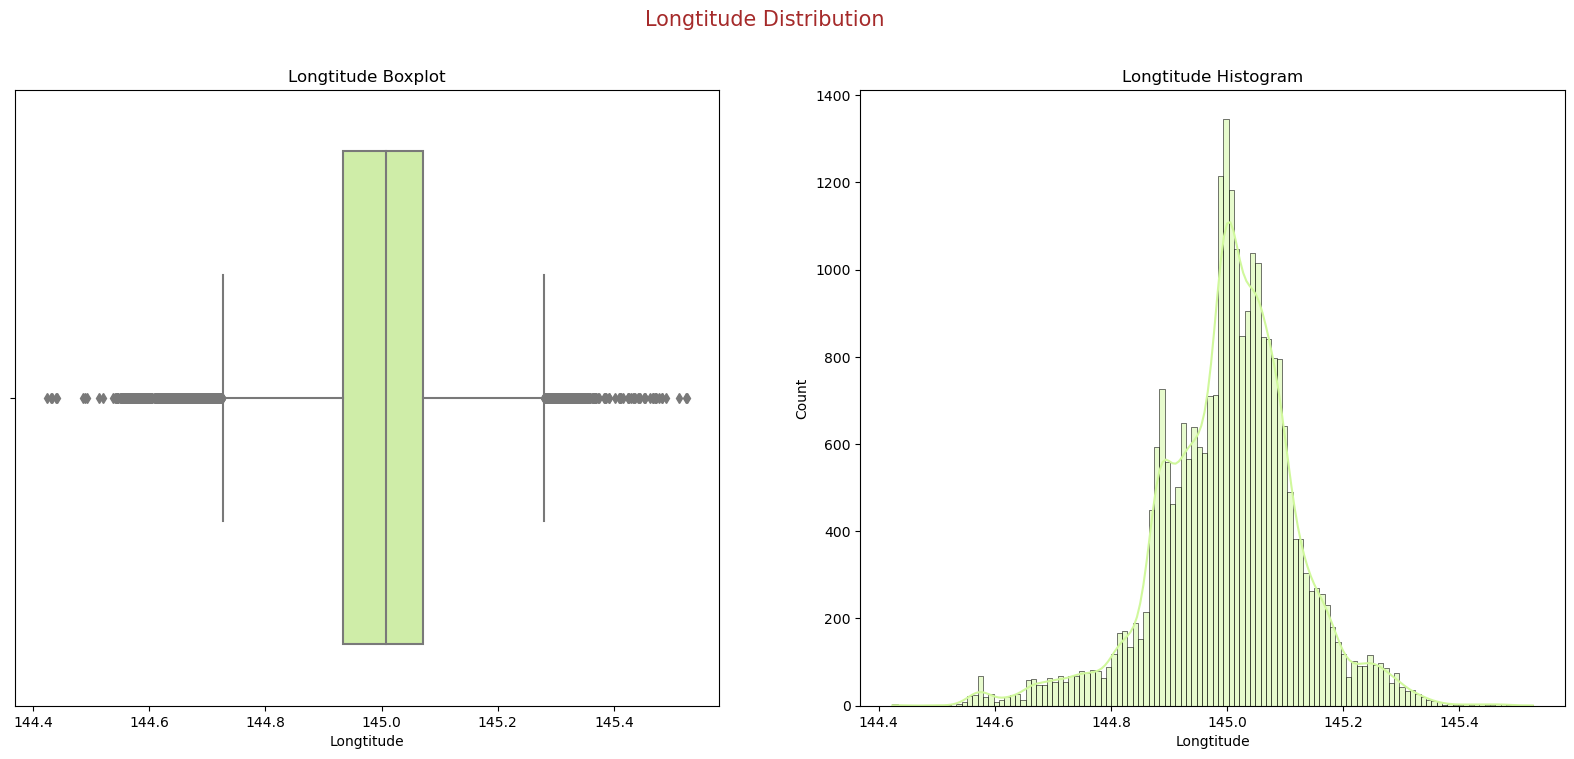

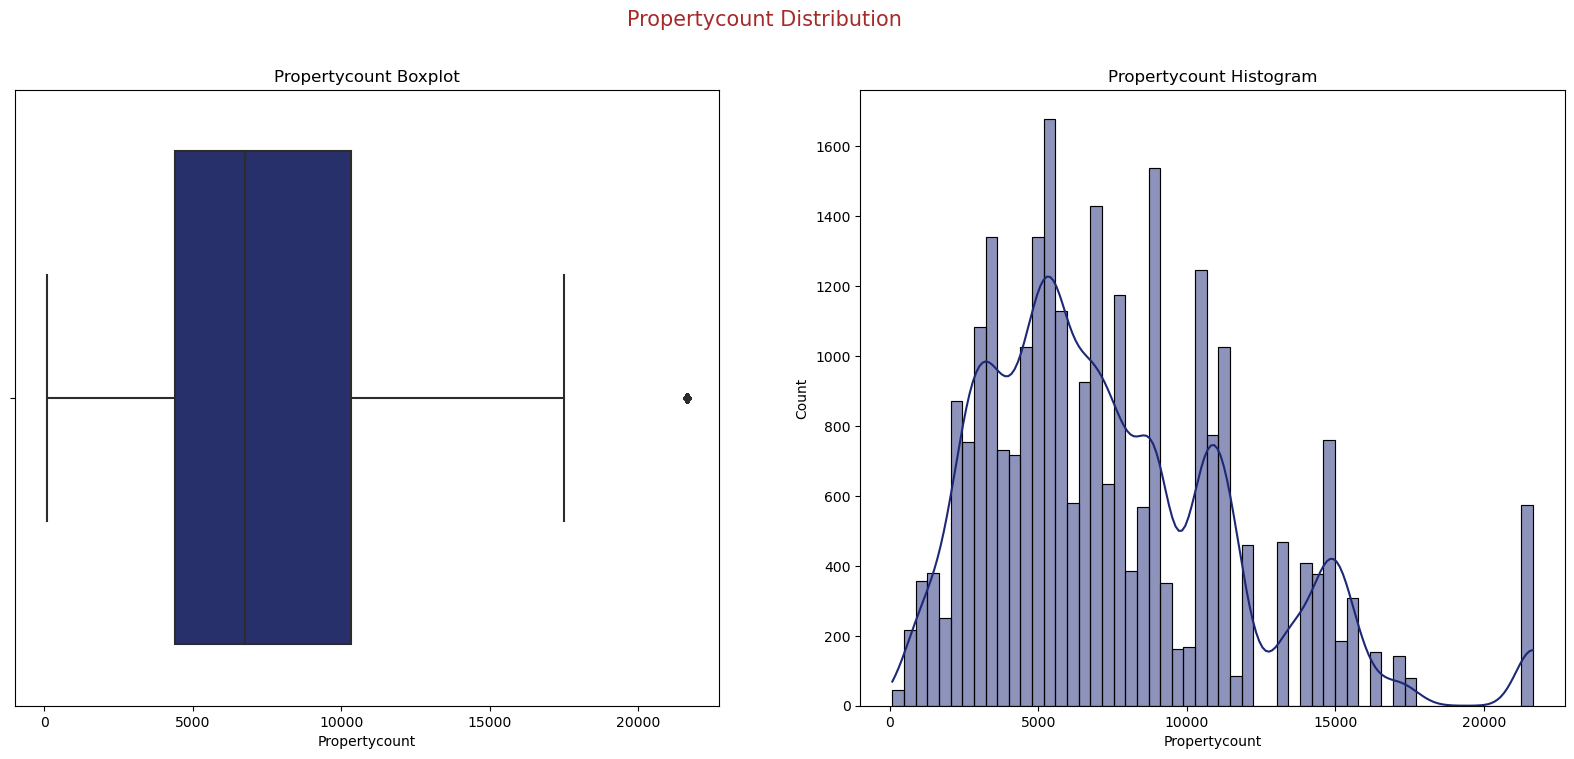

In [23]:
for i in num_cols:
    show_distribution(data, i)

**Notes about these plots:**
- The popular number of rooms is 3 rooms per house.
- Price has right skewed with lower value 85,000$, maxium value 11,200,000$, mean value 1,050,173$.
- Distance column has many outliers. The median distance is 10.3 Km.
- The popular number of bedrooms is 3 and for bathroom is 1.
-------------------------------------------

In [24]:
data.describe().style.background_gradient(cmap ="YlGnBu", vmin=0, vmax=9000)

#### Show information about object columns

In [25]:
for i in obj_cols:
    print(f'{i} unique number : {data[i].nunique()}', end='\n\n')
    print(f'{i} unique values : {data[i].unique()}', end='\n\n')
    print(data[i].value_counts()[:10])
    print('======================================================')

Suburb unique number : 345



Suburb unique values : ['Abbotsford' 'Airport West' 'Albert Park' 'Alphington' 'Altona'

 'Altona North' 'Armadale' 'Ascot Vale' 'Ashburton' 'Ashwood'

 'Avondale Heights' 'Balaclava' 'Balwyn' 'Balwyn North' 'Bentleigh'

 'Bentleigh East' 'Box Hill' 'Braybrook' 'Brighton' 'Brighton East'

 'Brunswick' 'Brunswick West' 'Bulleen' 'Burwood' 'Camberwell'

 'Canterbury' 'Carlton North' 'Carnegie' 'Caulfield' 'Caulfield North'

 'Caulfield South' 'Chadstone' 'Clifton Hill' 'Coburg' 'Coburg North'

 'Collingwood' 'Doncaster' 'Eaglemont' 'Elsternwick' 'Elwood' 'Essendon'

 'Essendon North' 'Fairfield' 'Fitzroy' 'Fitzroy North' 'Flemington'

 'Footscray' 'Glen Iris' 'Glenroy' 'Gowanbrae' 'Hadfield' 'Hampton'

 'Hampton East' 'Hawthorn' 'Heidelberg Heights' 'Heidelberg West'

 'Hughesdale' 'Ivanhoe' 'Kealba' 'Keilor East' 'Kensington' 'Kew'

 'Kew East' 'Kooyong' 'Maidstone' 'Malvern' 'Malvern East' 'Maribyrnong'

 'Melbourne' 'Middle Park' 'Mont Albert' 'Moonee Pon

> Address column has 34009 unique values and we can observe that each value has maximum repeation of 6 times, so we can drop this column because it doesn't give us much information.


In [26]:
data = data.drop('Address', axis=1)

In [27]:
obj_cols = obj_cols.tolist()

In [28]:
# Delete address from the list
obj_cols.pop(1)

'Address'

In [29]:
obj_cols

['Suburb', 'Type', 'Method', 'SellerG', 'Date', 'CouncilArea', 'Regionname']

In [30]:
# Extract year and month from Date column by converting it from object ----> datatime
data['year'] = pd.to_datetime(data['Date']).dt.year
data['month'] = pd.to_datetime(data['Date']).dt.month

In [31]:
obj_cols.extend(['year', 'month'])
obj_cols.pop(4)

'Date'

In [32]:
obj_cols

['Suburb',
 'Type',
 'Method',
 'SellerG',
 'CouncilArea',
 'Regionname',
 'year',
 'month']

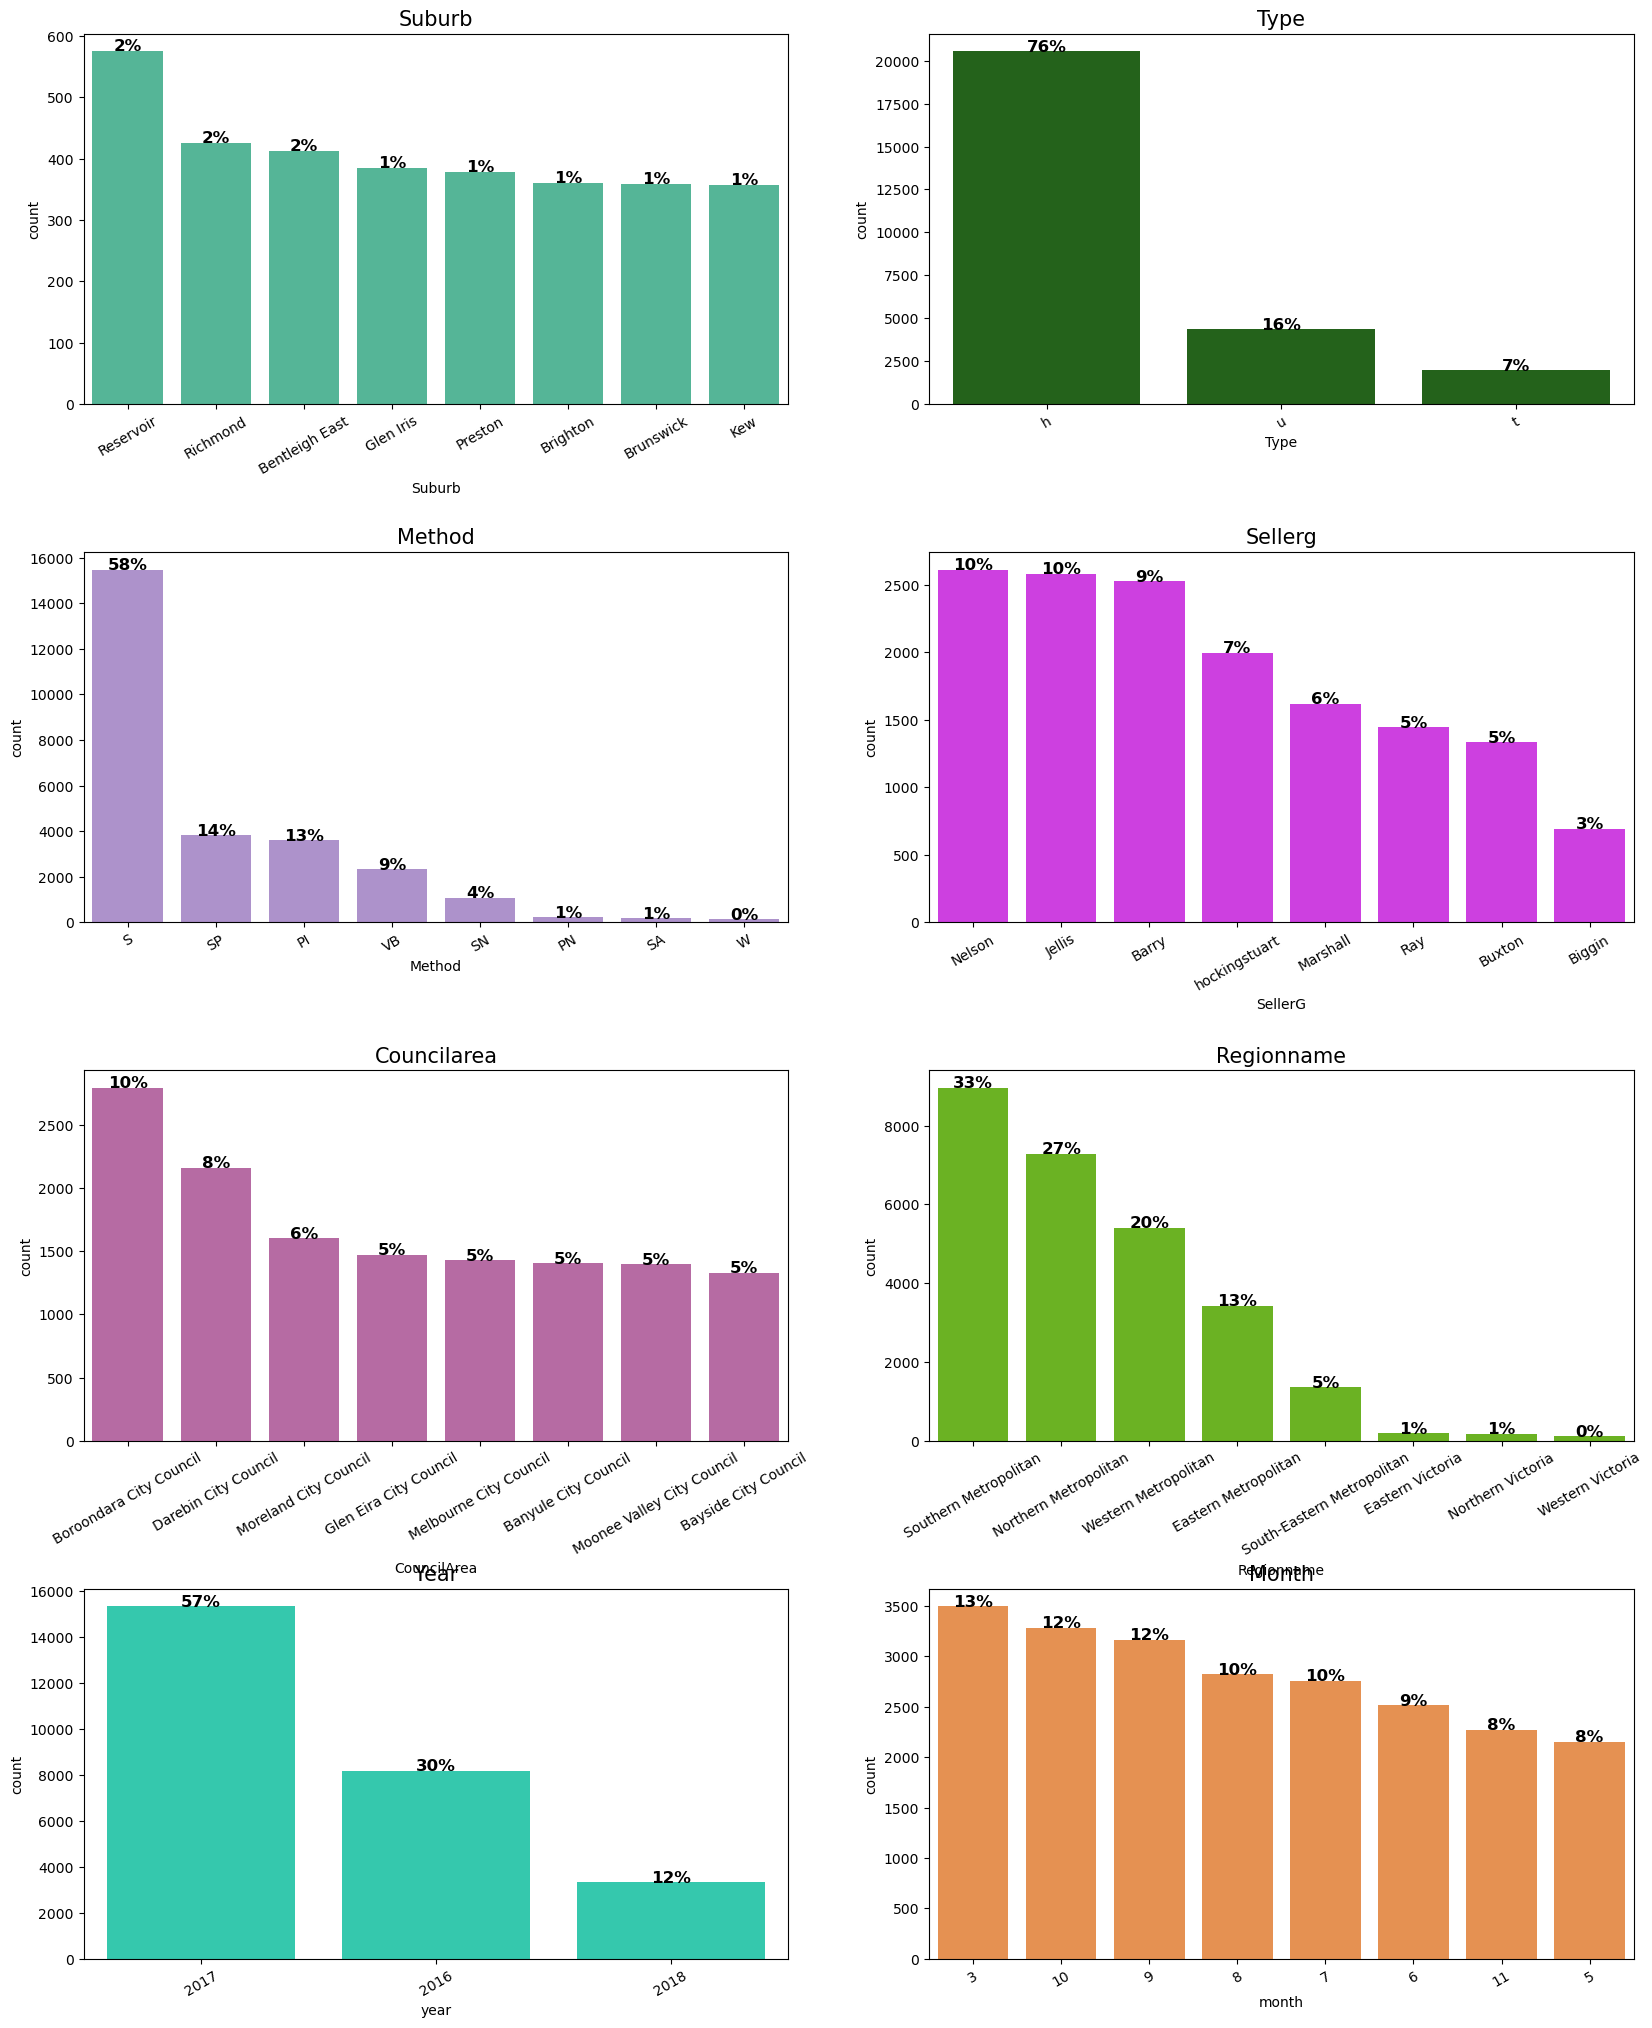

In [33]:
plt.figure(figsize=(20,25))

for i in range(len(obj_cols)):
    plt.subplot(4,2,i+1)
    ax = sns.countplot(data=data, x=obj_cols[i], order=data[obj_cols[i]].value_counts().index[:8], color=generate_colors(1)[0])
    plt.title(obj_cols[i].title(), fontsize=15)
    plt.xticks(rotation=30)
    
    for p in ax.patches:
        height=p.get_height()
        percent=(height*100)/float(len(data))
        ax.text(p.get_x()+p.get_width()/2,height+1,'{:.0f}%'.format(percent),ha='center',weight='bold',fontsize=12)
        
plt.subplots_adjust(hspace=0.4)

**Notes about these plots:**
- The most popular type of houses is H which mean ( house,cottage,villa, semi,terrace ).
- The most real estate agents who finish buying the house are Jellis, Neison, Barry and Hockingstuart.
- The popular method is S which means property sold with 57%.
- The most general region is southern metropolitan with 34% and northern metropolitan with 27%.
- March, October, September and November are the most months which is the most houses sold in these. And the most year which the most houses sold is 2017 with 57%

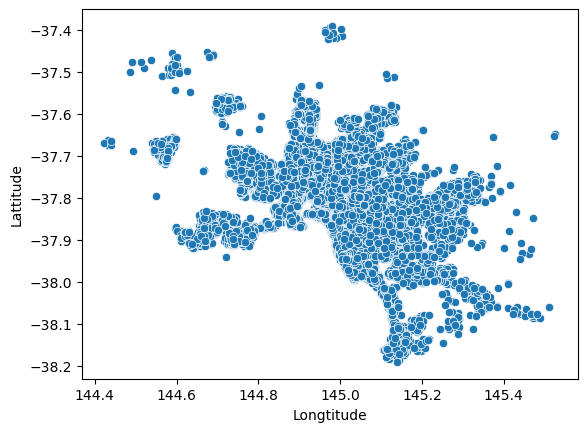

In [34]:
sns.scatterplot(data=data, x='Longtitude', y='Lattitude');

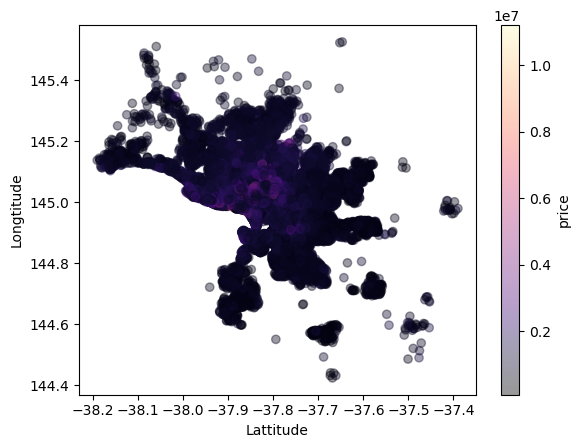

In [35]:
plt.scatter(x=data['Lattitude'], y=data['Longtitude'], c=data['Price'], cmap='magma', alpha=0.4)
plt.colorbar(label='price');
plt.xlabel('Lattitude')
plt.ylabel('Longtitude');

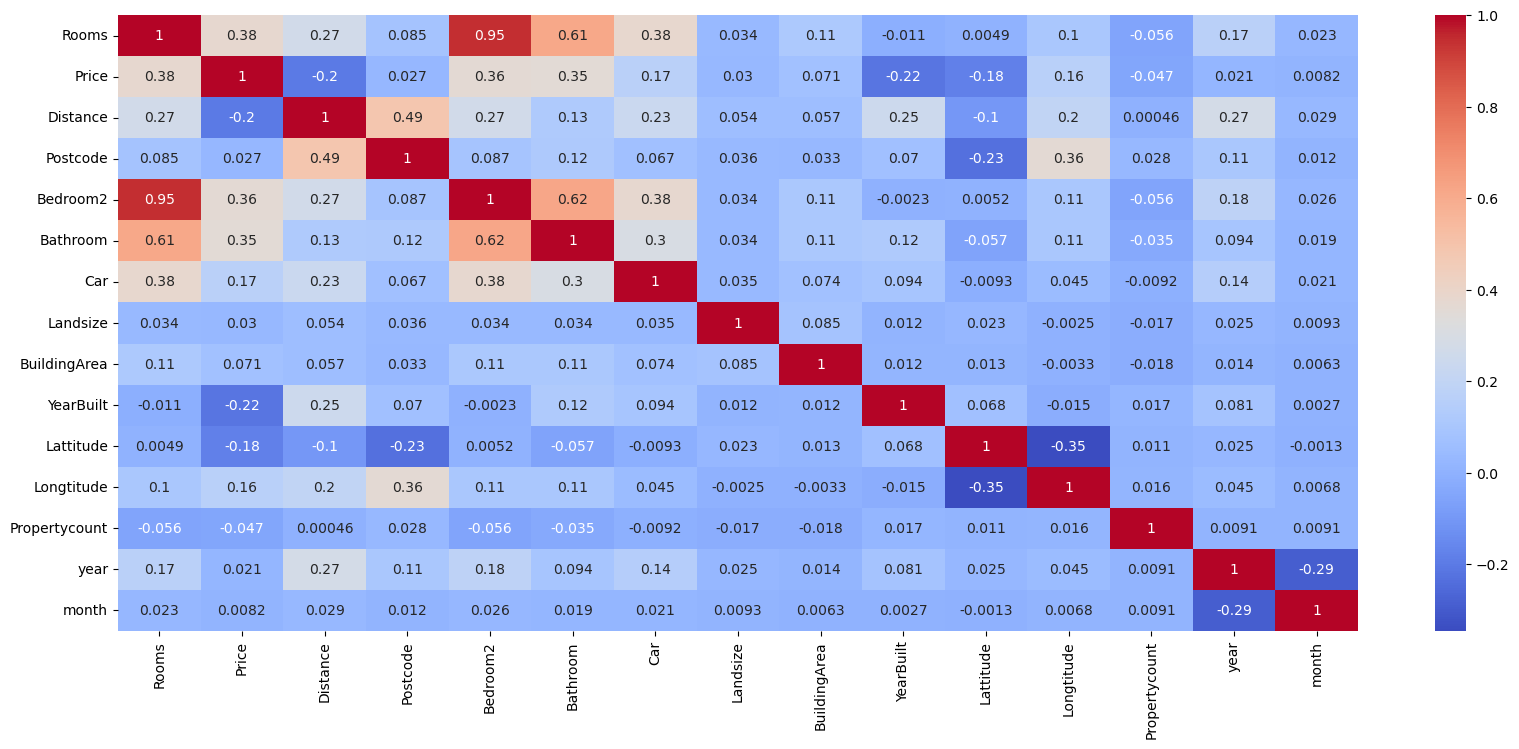

In [36]:
plt.figure(figsize=(20,8))
sns.heatmap(data=data.corr(), annot=True, cmap='coolwarm');

> By looking at correlation between features, we can say that the features which affect directly on price are **bathroom and bedroom**.

<a id="8"></a>
# <p style="background-color:#E3D6C5;font-family:newtimeroman;color:#FFF9ED;font-size:150%;text-align:center;border-radius:10px 10px;">Preprocessing Data</p>

In [37]:
data.select_dtypes(include='object').columns

Index(['Suburb', 'Type', 'Method', 'SellerG', 'Date', 'CouncilArea',
       'Regionname'],
      dtype='object')

In [38]:
# we don't need Date column
data.drop(columns=['Date', 'Suburb'], inplace=True)

In [39]:
obj_cols = data.select_dtypes(include='object').columns
obj_cols

Index(['Type', 'Method', 'SellerG', 'CouncilArea', 'Regionname'], dtype='object')

In [40]:
# dealing with object columns
from sklearn.preprocessing import OrdinalEncoder

oe = OrdinalEncoder()
data[obj_cols] = oe.fit_transform(data[obj_cols])

In [41]:
data.head(2)

Rooms  Type      Price  Method  SellerG  Distance  Postcode  Bedroom2  \
0      2   0.0   910000.0     6.0    142.0       2.5    3067.0       2.0   
1      2   0.0  1480000.0     2.0     28.0       2.5    3067.0       2.0   

   Bathroom  Car  Landsize  BuildingArea  YearBuilt  CouncilArea  Lattitude  \
0       1.0  1.0     126.0         136.0     1970.0         31.0   -37.8014   
1       1.0  1.0     202.0         136.0     1970.0         31.0   -37.7996   

   Longtitude  Regionname  Propertycount  year  month  
0    144.9958         2.0         4019.0  2016      3  
1    144.9984         2.0         4019.0  2016      3

In [42]:
data.to_csv('preprocessed_data.csv', index=False)

<a id="8"></a>
# <p style="background-color:#E3D6C5;font-family:newtimeroman;color:#FFF9ED;font-size:150%;text-align:center;border-radius:10px 10px;">Machine Learning Model</p>

In [43]:
from sklearn.model_selection import train_test_split

X = data.drop(['Price'],axis=1) # Features
y=data['Price']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)#70 % training and 30% testing

In [44]:
data.shape

(26880, 20)

In [45]:
X_train.shape

(18816, 19)

In [46]:
X_test.shape

(8064, 19)

#### Data Scaling using Robust Scaler

In [47]:
from sklearn.preprocessing import RobustScaler

In [48]:
ro_scaler = RobustScaler()
X_train = ro_scaler.fit_transform(X_train)
X_test = ro_scaler.fit_transform(X_test)

In [49]:
X_train.shape

(18816, 19)

#### Linear Regression

In [50]:
from sklearn.linear_model import LinearRegression

In [51]:
lin = LinearRegression()

In [52]:
lin.fit(X_train,y_train)

LinearRegression()

In [53]:
lin.score(X_train,y_train)

0.38996564212730866

In [54]:
lin.score(X_test , y_test)

0.30932978519912036

In [55]:
lin.coef_

array([ 2.67418782e+05, -1.70214564e+05, -7.44269389e+03, -1.15487036e+04,
       -2.81783951e+05,  6.19560068e+04, -5.24016057e+03,  1.38210000e+05,
        3.44079178e+04,  1.88096492e+03,  2.04719281e+02, -2.52591280e+04,
       -6.13195931e+04, -9.45816016e+04,  9.15214654e+04,  5.66451636e+04,
       -6.18506777e+03,  3.97935997e+04,  1.75928533e+04])

In [56]:
lin.intercept_

1230597.0613461677

In [57]:
pd.DataFrame(lin.coef_ , data.columns[:-1] , columns = ["coeficient"])

coeficient
Rooms          267418.781883
Type          -170214.563701
Price           -7442.693894
Method         -11548.703593
SellerG       -281783.950833
Distance        61956.006848
Postcode        -5240.160567
Bedroom2       138209.999844
Bathroom        34407.917830
Car              1880.964920
Landsize          204.719281
BuildingArea   -25259.127966
YearBuilt      -61319.593118
CouncilArea    -94581.601639
Lattitude       91521.465377
Longtitude      56645.163553
Regionname      -6185.067772
Propertycount   39793.599723
year            17592.853325

#### Ridg regression

In [58]:
from sklearn.linear_model import RidgeCV

In [59]:
rid = RidgeCV(alphas = 0.5)

In [60]:
rid.fit(X_train,y_train)

RidgeCV(alphas=array(0.5))

In [61]:
rid.score(X_train,y_train)

0.3899656358915531

In [62]:
rid.score(X_test , y_test)

0.3094737704026439

In [63]:
rid.coef_

array([ 2.67147217e+05, -1.70211407e+05, -7.44160747e+03, -1.15492697e+04,
       -2.81763149e+05,  6.19487109e+04, -4.99881618e+03,  1.38211838e+05,
        3.44103317e+04,  1.88094100e+03,  2.04728718e+02, -2.52617484e+04,
       -6.13142321e+04, -9.45776655e+04,  9.15200001e+04,  5.66446546e+04,
       -6.18537486e+03,  3.97834278e+04,  1.75875128e+04])

In [64]:
rid.intercept_

1230595.4850713962

In [65]:
pd.DataFrame(rid.coef_ , data.columns[:-1] , columns = ["coeficient"])

coeficient
Rooms          267147.217087
Type          -170211.406539
Price           -7441.607473
Method         -11549.269652
SellerG       -281763.149332
Distance        61948.710909
Postcode        -4998.816182
Bedroom2       138211.838350
Bathroom        34410.331736
Car              1880.941001
Landsize          204.728718
BuildingArea   -25261.748378
YearBuilt      -61314.232123
CouncilArea    -94577.665474
Lattitude       91520.000102
Longtitude      56644.654609
Regionname      -6185.374858
Propertycount   39783.427770
year            17587.512804

#### Lasso Regression

In [66]:
from sklearn.linear_model import LassoLars

In [67]:
rid = LassoLars()

In [68]:
rid.fit(X_train,y_train)

LassoLars()

In [69]:
rid.score(X_train,y_train)

0.38996276759898174

In [70]:
rid.score(X_test , y_test)

0.31154651150043833

In [71]:
rid.coef_

array([ 2.63008634e+05, -1.70054160e+05, -7.27259119e+03, -1.13734610e+04,
       -2.81370982e+05,  6.17587140e+04, -4.23926257e+02,  1.37952777e+05,
        3.42868254e+04,  1.86721894e+03,  2.03345793e+02, -2.52230705e+04,
       -6.11009245e+04, -9.45813095e+04,  9.12994432e+04,  5.63691590e+04,
       -6.01917427e+03,  3.92853372e+04,  1.71913501e+04])

In [72]:
rid.intercept_

1230095.2335780414

In [73]:
pd.DataFrame(rid.coef_ , data.columns[:-1] , columns = ["coeficient"])

coeficient
Rooms          263008.634091
Type          -170054.159637
Price           -7272.591190
Method         -11373.460964
SellerG       -281370.982001
Distance        61758.713958
Postcode         -423.926257
Bedroom2       137952.776554
Bathroom        34286.825403
Car              1867.218943
Landsize          203.345793
BuildingArea   -25223.070538
YearBuilt      -61100.924516
CouncilArea    -94581.309490
Lattitude       91299.443238
Longtitude      56369.159016
Regionname      -6019.174271
Propertycount   39285.337232
year            17191.350078

#### VIF

In [74]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [75]:
vif_data = pd.DataFrame()

In [76]:
vif_data["feature"] = X.columns

In [77]:
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]

In [78]:
print(vif_data)

          feature           VIF

0           Rooms  1.145455e+02

1            Type  2.072005e+00

2          Method  2.912500e+00

3         SellerG  3.747169e+00

4        Distance  6.404243e+00

5        Postcode  1.224816e+03

6        Bedroom2  1.066791e+02

7        Bathroom  1.065234e+01

8             Car  4.993202e+00

9        Landsize  1.046815e+00

10   BuildingArea  1.298608e+00

11      YearBuilt  5.952899e+03

12    CouncilArea  3.235733e+00

13      Lattitude  2.977894e+05

14     Longtitude  3.029501e+06

15     Regionname  8.480282e+00

16  Propertycount  4.101548e+00

17           year  2.266052e+06

18          month  6.537992e+00
